In [1]:

import os
!pip install torch==2.0.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
#torch_version = '2.0.0+cu118'
#!pip install torch-scatter -f https://data.pyg.org/whl/torch-${torch.__version__}.html
#!pip install torch-cluster -f https://data.pyg.org/whl/torch-${torch.__version__}.html
#!pip install torch-sparse -f https://data.pyg.org/whl/torch-${torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
!pip install sentence-transformers
!pip install torcheval
!pip install matplotlib
!pip install pandas
!pip install tensorboard

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 2.7 MB/s eta 0:00:00:00:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 13.3 MB/s eta 0:00:0000:0100:01
  Using cached https://download.pytorch.org/whl/cmake-3.25.0-py2.py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (23.7 MB)
  Using cached https://download.pytorch.org/whl/lit-15.0.7.tar.gz (132 kB)
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 28.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 29.1 MB/s eta 0:00:0000:0100:01
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# if colab:
    # Install required packages.
    # !pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
    # !pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
    # !pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
    # !pip install git+https://github.com/pyg-team/pytorch_geometric.git
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# !pip install torch_geometric
# !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
# !pip install sentence-transformers
# !pip install torcheval
# !pip install matplotlib
# !pip install pandas
# !pip install tensorboard

    # unpack datasets
    # if not 'unzipped' in globals():
    #     !unzip /content/drive/MyDrive/DataExplorationProject/Skill_Ontology_GNN/neo4jgraph.zip
    #     unzipped =True

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 1.6 MB/s eta 0:00:00:00:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 30.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.3 MB/s eta 0:00:00a 0:00:01
  Using cached https://download.pytorch.org/whl/filelock-3.9.0-py3-none-any.whl (9.7 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached https://download.pytorch.org/whl/networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2023.4.0-py3-none-any.whl (153 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 25.1 MB/s eta 0:00:0000:0100:01
  Using cached https://download.pytorch.org/whl/numpy-1.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached ht

In [59]:
import pandas as pd
from torch_geometric.data import HeteroData
import torch_geometric.transforms as T

In [60]:
# only use skill nodes which have normalized_name != NaN, this is some indication of quality skill (?)
skill_nodes = pd.read_csv(colab_path+'neo4jgraph/skills.csv').dropna(subset=['normalized_name']).reset_index()
job_nodes = pd.read_csv(colab_path+'neo4jgraph/onet_skills_unique.csv')

# drop some skills "or"
skill_nodes = skill_nodes.loc[~skill_nodes.skill.isin(['or','technology'])]

In [61]:
# There are duplicate normalized names
skill_nodes.shape[0]-skill_nodes.normalized_name.unique().shape[0]

38692

In [62]:
# There are not as many skill names which are duplicate
skill_nodes.shape[0]-skill_nodes.skill.unique().shape[0]

2483

In [63]:
# we can not use normalized name instead of skill, because it is ambiguous, e.g. communication points to different normalized names
skill_nodes.loc[skill_nodes.skill=='communication']

,index,skill,category,normalized_name
695,2229,communication,communication,Third-Party Provider Communication
1292,4059,communication,healthcare,Communication (Including SBAR)
4228,12919,communication,communication,Friendly Communication
5528,16927,communication,communication,radio/telephone communication
6311,19452,communication,communication,communication (phone and email)
...,...,...,...,...
223829,759817,communication,communication,Calling/Applying
224556,762531,communication,communication,Communication
238581,818822,communication,communication,Email/Phone Communication
245411,848577,communication,soft skills,Communication (Phone/Face-to-Face)


In [64]:
skill_nodes.drop_duplicates(subset='skill', inplace=True)

In [174]:

skill_job_edges = pd.read_csv(colab_path+'neo4jgraph/tfidf_skill_job_edge.csv')
#skill_job_edges = skill_job_edges.loc[skill_job_edges.scaled_tfidf>8]
# only use edges where we have the skill and job for from the other files
skill_job_edges = skill_job_edges.loc[skill_job_edges['skill'].isin(skill_nodes['skill'])]
skill_job_edges = skill_job_edges.loc[skill_job_edges['alt_title'].isin(job_nodes.index)]

In [103]:
skill_job_edges

,alt_title,skill,scaled_tfidf,n_jobdesc_used
1,55010,design,9.887307,240
5,55010,cg,8.744163,240
10,55010,visual effects,6.299518,240
11,55010,software,5.288013,240
12,55010,unity,5.278638,240
...,...,...,...,...
7926039,15285,analysis,6.147100,1
7926040,15285,software,6.013723,1
7926041,15285,engineering,5.864380,1
7926050,15285,development,4.434249,1


In [175]:
skillmapping ={}
for i,skill in enumerate(skill_nodes.skill.unique()):
    skillmapping[skill] =i

jobmapping ={}
for i,index in enumerate(job_nodes['index'].unique()):
    jobmapping[index] =i

inverted_skillmapping = {v:k for k,v in skillmapping.items()}
inverted_jobmapping = {v:k for k,v in jobmapping.items()}

In [176]:
skill_job_edges['skill_dst'] = skill_job_edges['skill'].apply(lambda x:skillmapping[x])
skill_job_edges['job_src'] = skill_job_edges['alt_title'].apply(lambda x:jobmapping[x])

In [177]:
# normalization and removal of job-skill edges
# first group by jobs and limit the skills for each job to 175
# then normalize those tfidf edgeweights
# then group by skill and limit edges to 125 for skills (ordered by normalized tf-idf)
skill_job_edges = skill_job_edges.groupby('job_src').apply(lambda group: group.nlargest(175,'scaled_tfidf')).reset_index(drop=True)
summed_tfidf_per_job = skill_job_edges.groupby('job_src').sum()
skill_job_edges['sum'] = skill_job_edges['job_src'].apply(lambda x: summed_tfidf_per_job.loc[x]['scaled_tfidf'])
skill_job_edges['normalized_tfidf'] =  skill_job_edges['scaled_tfidf']/skill_job_edges['sum']
skill_job_edges = skill_job_edges.groupby('skill_dst').apply(lambda group: group.nlargest(125,'normalized_tfidf')).reset_index(drop=True)

In [ ]:
# normalization and removing of skill-skill edges


In [121]:


#for each alt title select the first 125 skill_job edges, ordered by tfidf
skill_job_edges = skill_job_edges.groupby('alt_title')
skill_job_edges = skill_job_edges.groupby('alt_title').apply(lambda group: group.nlargest(125,'scaled_tfidf')).reset_index(drop=True)

# for each skill only use the 125 edges with the highest tf-idf score
#skill_job_edges = skill_job_edges.groupby('skill').apply(lambda group: group.nlargest(125,'scaled_tfidf')).reset_index(drop=True)

In [173]:
skill_job_edges

,scaled_tfidf,skill_dst,job_src,sum,normalized_tfidf
0,35.545516,126198,7,163.983794,0.216762
1,14.444801,184892,7,163.983794,0.088087
2,13.682348,115677,7,163.983794,0.083437
3,11.763047,88426,7,163.983794,0.071733
4,10.088181,221750,7,163.983794,0.061519
...,...,...,...,...,...
339405,6.736089,49534,55648,191.613717,0.035155
339406,6.629133,222265,55648,191.613717,0.034596
339407,6.265465,50164,55648,191.613717,0.032698
339408,5.501605,95122,55648,191.613717,0.028712


In [71]:
if colab:
    onet_alttitles = pd.read_csv(colab_path+'/content/neo4jgraph/onet_alt_titles_unique.csv')
else:
    onet_alttitles = pd.read_csv('neo4jgraph/onet_alt_titles_unique.csv')
del onet_alttitles['Unnamed: 0']

In [72]:
onet_alttitle_str_mapping = {}
for i,row in onet_alttitles.iterrows():
    onet_alttitle_str_mapping[row['index']] = row['Alternate Title']

In [73]:
from sentence_transformers import SentenceTransformer, util
embedder = SentenceTransformer('all-MiniLM-L6-v2')


In [74]:
# create alttitle sbert embeddings to get pca dim

alttitle_sbert_embeddings = embedder.encode(list(onet_alttitle_str_mapping.values()), convert_to_tensor=False, device='cuda')
#alttitle_sbert_indices = [k for k,v in temp]
#corpus_embeddings = util.normalize_embeddings(corpus_embeddings)

In [75]:
import numpy as np
v = alttitle_sbert_embeddings[0]
np.matmul(v.T,v)

0.99999994

In [76]:
skill_sbert_embeddings = embedder.encode(list(skillmapping.keys()), convert_to_tensor=False, device='cuda')

In [77]:

from sklearn.decomposition import PCA
X = np.concatenate([alttitle_sbert_embeddings,skill_sbert_embeddings])

# print('Original:',X.shape[1])
# for variance_retained in [0.99,0.95,0.9,0.8,0.75,0.7]:
#     pca = PCA(n_components=variance_retained)
#     pca.fit(X)
#     n_components_retained = pca.n_components_
#     print(n_components_retained,' components retained', variance_retained, ' variance retained')

In [78]:
# choose 128
pca = PCA(n_components=128)
pca.fit(X)

skill_sbert_embeddings = pca.transform(embedder.encode(skill_nodes['skill'].tolist(), convert_to_numpy=True, device='cuda'))
job_sbert_embeddings = pca.transform(embedder.encode(job_nodes['Alternate Title'].tolist(), convert_to_numpy=True, device='cuda'))

In [79]:
# add job-job edges, dataset see https://www.onetcenter.org/dictionary/26.3/excel/related_occupations.html
job_job_edges = pd.read_csv(colab_path+'neo4jgraph/onet_related_occupations.csv')

In [80]:
job_job_edges

,O*NET-SOC Code,Title,Related O*NET-SOC Code,Related Title,Relatedness Tier,index_x,index_y
0,11-1011.00,Chief Executives,11-1021.00,General and Operations Managers,Primary-Short,54641,54643
1,11-1031.00,Legislators,11-1021.00,General and Operations Managers,Supplemental,54644,54643
2,11-2021.00,Marketing Managers,11-1021.00,General and Operations Managers,Supplemental,54646,54643
3,11-2022.00,Sales Managers,11-1021.00,General and Operations Managers,Primary-Long,54647,54643
4,11-2032.00,Public Relations Managers,11-1021.00,General and Operations Managers,Primary-Long,54648,54643
...,...,...,...,...,...,...,...
18379,53-2022.00,Airfield Operations Specialists,53-2011.00,"Airline Pilots, Copilots, and Flight Engineers",Primary-Short,55590,55587
18380,53-2031.00,Flight Attendants,53-2011.00,"Airline Pilots, Copilots, and Flight Engineers",Supplemental,55591,55587
18381,53-5021.00,"Captains, Mates, and Pilots of Water Vessels",53-2011.00,"Airline Pilots, Copilots, and Flight Engineers",Primary-Short,55608,55587
18382,53-5022.00,Motorboat Operators,53-2011.00,"Airline Pilots, Copilots, and Flight Engineers",Supplemental,55609,55587


In [81]:
job_job_edges['job_src'] = job_job_edges['index_x'].apply(lambda x: jobmapping[x])
job_job_edges['job_dst'] = job_job_edges['index_y'].apply(lambda x: jobmapping[x])
relatedness_weight = {
    'Supplemental':1,
    'Primary-Long':2,
    'Primary-Short':4
}
job_job_edges['relatedness_weight'] = job_job_edges['Relatedness Tier'].apply(lambda x: relatedness_weight[x])

In [191]:
skill_skill_edges = pd.read_csv(colab_path+'neo4jgraph/skill_skill_edges.csv')


In [192]:
#filter out potentially bad skills (which are not in our original skillmapping)
skill_skill_edges = skill_skill_edges.loc[(skill_skill_edges.skill.isin(list(skillmapping.keys()))) & (skill_skill_edges.related_skill.isin(list(skillmapping.keys())))]

In [193]:
skill_skill_edges['skill_src'] = skill_skill_edges['skill'].apply(lambda x: skillmapping[x])
skill_skill_edges['skill_dst'] = skill_skill_edges['related_skill'].apply(lambda x: skillmapping[x])

In [194]:
# only take largest 125 "both directions" (not ideal)
skill_skill_edges =  skill_skill_edges.groupby('skill_src').apply(lambda group: group.nlargest(125,'cosine_sim_score')).reset_index(drop=True)
skill_skill_edges =  skill_skill_edges.groupby('skill_dst').apply(lambda group: group.nlargest(125,'cosine_sim_score')).reset_index(drop=True)

In [214]:
from torch_geometric.data import HeteroData


data = HeteroData()
data['Skill'].x = torch.tensor(skill_sbert_embeddings)
data['Job'].x = torch.tensor(job_sbert_embeddings)

data['Job','REQUIRES','Skill'].edge_index = torch.tensor(skill_job_edges[['job_src','skill_dst']].to_numpy().T)
data['Skill','IS_SIMILAR_SKILL','Skill'].edge_index = torch.tensor(skill_skill_edges[['skill_src','skill_dst']].to_numpy().T)
data['Job','IS_SIMILAR_JOB','Job'].edge_index = torch.tensor(job_job_edges[['job_src','job_dst']].to_numpy().T)


data['Job','REQUIRES','Skill'].edge_weight = torch.tensor(skill_job_edges['scaled_tfidf'].to_numpy()).to(torch.float)
data['Skill','IS_SIMILAR_SKILL','Skill'].edge_weight = torch.tensor(skill_skill_edges['cosine_sim_score'].to_numpy()).to(torch.float)
data['Job','IS_SIMILAR_JOB','Job'].edge_weight = torch.tensor(job_job_edges['relatedness_weight'].to_numpy()).to(torch.float)


In [86]:
data['Job'].x.shape

torch.Size([55653, 128])

In [184]:
skill_skill_edges_temp = skill_skill_edges

In [185]:
skill_skill_edges_temp.shape

(1273676, 7)

Jobs: 55653, actual Jobs used (in at least one edge): 16269
Skills: 247830, actual Skills used (in at least one edge): 120329

Following metrics only include Skills and Jobs with at least one edge:

JRS edges: 630303
Average JRS Job degree: 38.742576599121094, Skill: 5.238163471221924
Median JRS Job degree: 25.0, Skill: 4.0
Max JRS Job degree: 136.0, Skill: 125.0

S_SIM_S edges: 1038536
Average S_SIM_S degree: 17.261608123779297
Median S_SIM_S degree: 5.0
Max S_SIM_S degree: 250.0
J_SIM_J edges: 18384
Average J_SIM_J degree: 2.2600038051605225
Median J_SIM_J degree: 37.0
Max J_SIM_J degree: 126.0

Average total degree: Job: 41.00258255004883
Average total degree: Skill: 22.499771118164062


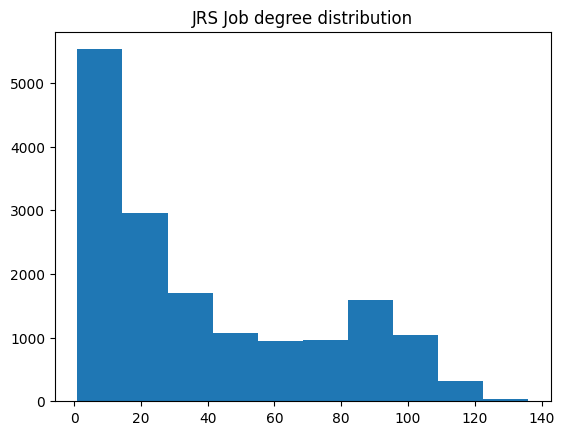

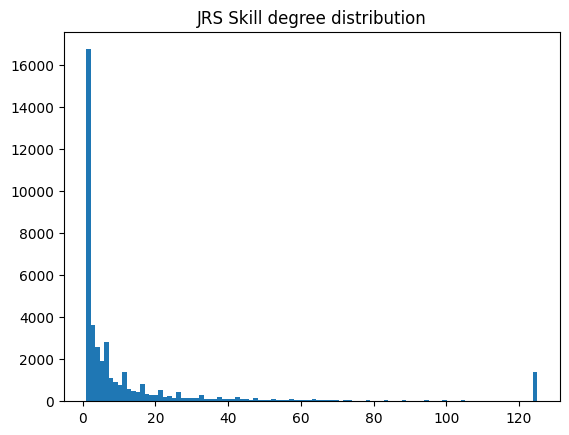

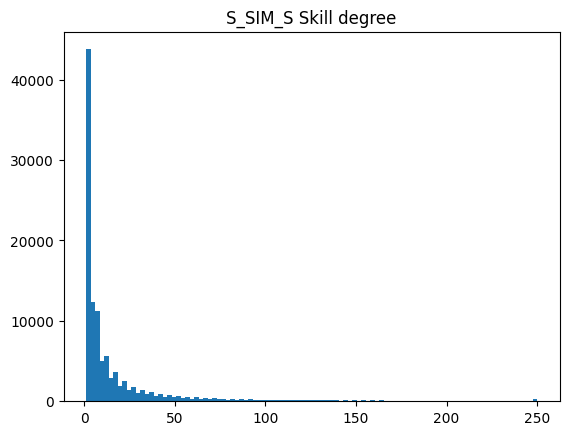

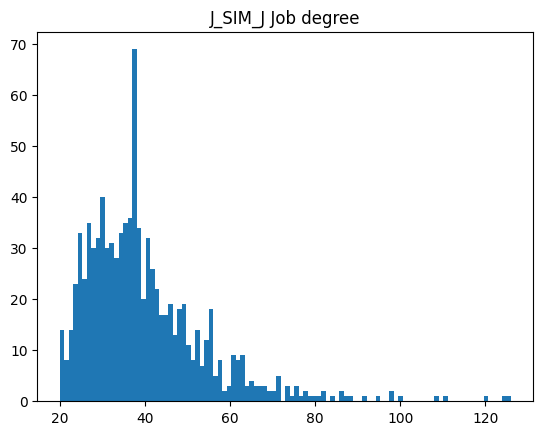

In [215]:
# Look at node degree statistics

from torch_geometric.utils import to_dense_adj, degree



job_n = data['Job'].x.shape[0]
skill_n = data['Skill'].x.shape[0]

JRS_J = degree(data['Job','REQUIRES','Skill'].edge_index[0], num_nodes=job_n)
JRS_S = degree(data['Job','REQUIRES','Skill'].edge_index[1], num_nodes=skill_n)
S_SIM_S = degree(data['Skill','IS_SIMILAR_SKILL','Skill'].edge_index.flatten(), num_nodes=skill_n)
J_SIM_J = degree(data['Job','IS_SIMILAR_JOB','Job'].edge_index.flatten(), num_nodes=job_n)

actual_skill_n = torch.nonzero(JRS_S+S_SIM_S).shape[0] # only skills which have any edge at all
actual_job_n = torch.nonzero(JRS_J+J_SIM_J).shape[0] # only job which have any edge at all
print(f'Jobs: {job_n}, actual Jobs used (in at least one edge): {actual_job_n}')
print(f'Skills: {skill_n}, actual Skills used (in at least one edge): {actual_skill_n}')

print('\nFollowing metrics only include Skills and Jobs with at least one edge:\n')

print(f"JRS edges: {data['Job','REQUIRES','Skill'].edge_index.shape[1]}")
print(f'Average JRS Job degree: {torch.sum(JRS_J)/actual_job_n}, Skill: {torch.sum(JRS_S)/actual_skill_n}')
print(f'Median JRS Job degree: {torch.median(JRS_J[JRS_J!=0])}, Skill: {torch.median(JRS_S[JRS_S!=0])}')
print(f'Max JRS Job degree: {torch.max(JRS_J)}, Skill: {torch.max(JRS_S)}\n')

print(f"S_SIM_S edges: {data['Skill','IS_SIMILAR_SKILL','Skill'].edge_index.shape[1]}")
print(f'Average S_SIM_S degree: {torch.sum(S_SIM_S)/actual_skill_n}')
print(f'Median S_SIM_S degree: {torch.median(S_SIM_S[S_SIM_S!=0])}')
print(f'Max S_SIM_S degree: {torch.max(S_SIM_S)}')

print(f'J_SIM_J edges: {data["Job", "IS_SIMILAR_JOB", "Job"].edge_index.shape[1]}')
print(f'Average J_SIM_J degree: {torch.sum(J_SIM_J)/actual_job_n}')
print(f'Median J_SIM_J degree: {torch.median(J_SIM_J[J_SIM_J!=0])}')
print(f'Max J_SIM_J degree: {torch.max(J_SIM_J)}\n')

print(f'Average total degree: Job: {(torch.sum(JRS_J)+torch.sum(J_SIM_J))/actual_job_n}')
print(f'Average total degree: Skill: {(torch.sum(JRS_S)+torch.sum(S_SIM_S))/actual_skill_n}')

import matplotlib.pyplot as plt
plt.title('JRS Job degree distribution')
plt.hist(JRS_J[JRS_J!=0], bins=10);
plt.show()
plt.title('JRS Skill degree distribution')
plt.hist(JRS_S[JRS_S!=0], bins=100);
plt.show()
plt.title('S_SIM_S Skill degree')
plt.hist(S_SIM_S[S_SIM_S!=0], bins=100);
plt.show()
plt.title('J_SIM_J Job degree')
plt.hist(J_SIM_J[J_SIM_J!=0], bins=100);
plt.show()

In [216]:
# Add features:
# - node degree
# - normalize edge weights by node degree
# - (triangle count)


# add node degree statistics:

job_degrees = torch.cat((JRS_J.reshape(-1,1) / 125, J_SIM_J.reshape(-1,1)/ 125), dim=1) # divide by approx. max degrees
skill_degrees = torch.cat((JRS_S.reshape(-1,1) / 125, S_SIM_S.reshape(-1,1)/ 125), dim=1) # divide by approx. max degrees

data['Job'].x = torch.cat((data['Job'].x, job_degrees), dim=1)
data['Skill'].x = torch.cat((data['Skill'].x, skill_degrees), dim=1)

# normalize edge weights by node degree

In [200]:
# adj_matmul
# row1 to rowS * full_matrix
# rowS+1 to rowT * full_matrix
# ....

# def blockwise_sparse_square_mmul(adj_matrix, blocks=None):
#     row_blocks = []
    
#     if blocks is None:
#         row_block_size = 10000
#         rows = adj_matrix.size(0)
#         for block in tqdm(range(0,rows, row_block_size), desc='blockwise sparse matrix-multiplication'):
#             start = block
#             end = min(block+row_block_size, rows)
#             row_blocks.append(adj_matrix[start:end].spspmm(adj_matrix))
#     else:
#         for block in tqdm(blocks, desc='blockwise sparse matrix-multiplication'):
#             row_blocks.append(block.spspmm(adj_matrix))

#     return row_blocks


# def blockwise_sparse_get_diag(blocks):
#     diags = []
#     for block in tqdm(blocks, desc='get blockwise sparse matrix diagonal'):
#         diags.append(get_diag(block))
    
#     return torch.cat(diags, dim=0)

def triangle_count(adj_matrix:SparseTensor):
    # adj_matmul, blockwise, so kernel does not crash
    # diag1((row1 to rowS) * full_matrix * full_matrix)
    # diag2((rowS+1 to rowR) * full_matrix * full_matrix)
    # ....
    diags = []
    
    row_block_size = 10000
    rows = adj_matrix.size(0)
    with torch.no_grad():
        for block in tqdm(range(0,rows, row_block_size), desc='blockwise sparse matrix-multiplication'):
            start = block
            end = min(block+row_block_size, rows)
            adj_pow_3_block = adj_matrix[start:end].spspmm(adj_matrix).spspmm(adj_matrix)
            diag_block = get_diag(adj_pow_3_block[:,start:])
            diags.append(diag_block)
            # diag = torch.eye(end)
            # indices_i, indices_j = diag.nonzero().unbind(dim=1)
            
            # A = adj_pow_2_block[indices_i]
            # B = adj_matrix[:, indices_j]
            # print(A, t(B))
            # print(type(B), type(A))
            # print(A.size(0), A.size(1), B.size(0), B.size(1))
            #C = A * t(B)
            #C = reduction(C, dim=1)
            
           
            #print(C)
            
            
            
    
    return 1/2 * torch.cat(diags, dim=0)
        
from torch_geometric.utils import to_undirected
from torch_sparse import SparseTensor
from torch_sparse.diag import get_diag

def undirected_triangle_counts(edge_index, max_num_nodes): 
    """Get triangles **per node**, to get count for whole graph, divide by 3"""
    ud = to_undirected(edge_index)
    
    adj_matrix = SparseTensor(row=ud[0], col=ud[1], value=torch.ones(ud[1].shape[0]), sparse_sizes=(max_num_nodes, max_num_nodes))
    #adj_matrix = torch.sparse_coo_tensor(edge_index, torch.ones(edge_index.shape[1]), (max_num_nodes, max_num_nodes))
    #adj_matrix = torch.sparse_csr_tensor(ud[0], ud[1], values=torch.ones(ud[1].shape[0]), dtype=torch.float32).to_sparse_coo()
    triangles = triangle_count(adj_matrix) 
    return triangles

In [90]:
# from torch_sparse import SparseTensor
# adj = torch.tensor(
#     [
#         [0,1,1,1,1],
#         [1,0,1,0,1],
#         [1,1,0,1,0],
#         [1,0,1,0,1],
#         [1,1,0,1,0]
#     ]
# ).to(torch.float)
# X = SparseTensor.from_dense(adj)
# triangles = triangle_count(X)
# triangles
#adj_matrix = SparseTensor(row=ud[0], col=ud[1], value=torch.ones(ud[1].shape[0]), sparse_sizes=(max_num_nodes, max_num_nodes))

blockwise sparse matrix-multiplication: 100%|██████████| 2/2 [00:00<00:00, 387.16it/s]

tensor([[8., 8., 8., 8., 8.],
        [8., 4., 8., 4., 8.],
        [8., 8., 4., 8., 4.]])
tensor([[8., 4., 8., 4., 8.],
        [8., 8., 4., 8., 4.]])


tensor([4., 2., 2., 2., 2.])

In [201]:
homogeneous_data = data.to_homogeneous()
homogenous_triangles = undirected_triangle_counts(homogeneous_data.edge_index, homogeneous_data.x.shape[0])
# max triangles: 9000


blockwise sparse matrix-multiplication: 100%|██████████| 31/31 [08:24<00:00, 16.28s/it]


In [232]:
Job_homogeneous_triangles = homogenous_triangles[homogeneous_data.node_type == 1]
Skill_homogeneous_triangles = homogenous_triangles[homogeneous_data.node_type != 1]

In [242]:
actual_s_triangles = Skill_homogeneous_triangles[(JRS_S+S_SIM_S)!=0] 
actual_j_triangles = Job_homogeneous_triangles[(JRS_J+J_SIM_J)!=0] 

print(f'Median triangles of skill nodes: {actual_s_triangles.median()}, mean: {actual_s_triangles.mean()}, max: {actual_s_triangles.max()}, min: {actual_s_triangles.min()}')
print(f'Median triangles of job nodes: {actual_j_triangles.median()}, mean: {actual_j_triangles.mean()}, max: {actual_j_triangles.max()}, min: {actual_s_triangles.min()}')

Median triangles of skill nodes: 3.0, mean: 119.4788818359375, max: 9285.0, min: 0.0
Median triangles of job nodes: 6.0, mean: 35.88124465942383, max: 1320.0, min: 0.0


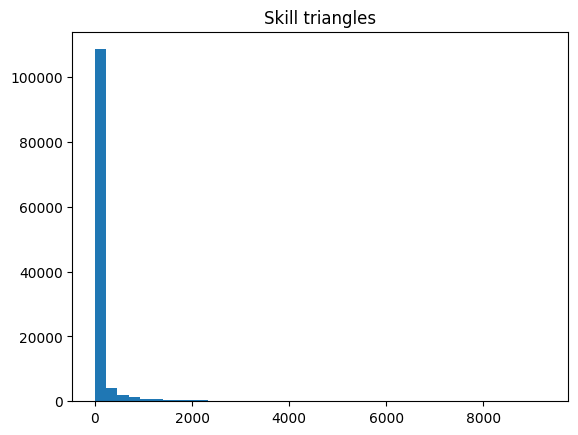

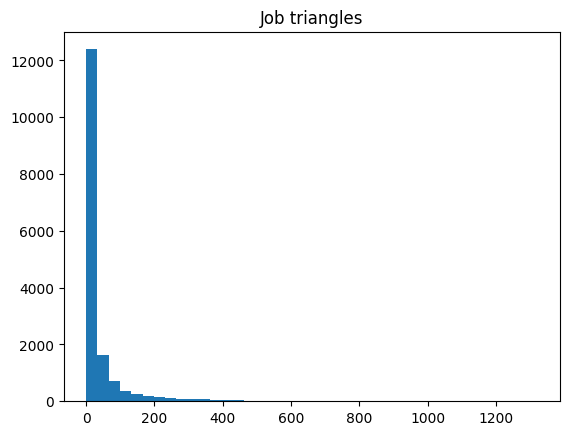

In [245]:
plt.title('Skill triangles')
plt.hist(actual_s_triangles.numpy(), bins=40)
plt.show()
plt.title('Job triangles')
plt.hist(actual_j_triangles.numpy(), bins=40)
plt.show()

In [246]:
J_SIM_J_triangles = undirected_triangle_counts(data['Job','IS_SIMILAR_JOB', 'Job'].edge_index, data['Job'].x.shape[0])
S_SIM_S_triangles = undirected_triangle_counts(data['Skill','IS_SIMILAR_SKILL', 'Skill'].edge_index, data['Skill'].x.shape[0])

blockwise sparse matrix-multiplication: 100%|██████████| 25/25 [02:55<00:00,  7.00s/it]


In [248]:
actual_s_triangles = S_SIM_S_triangles[(JRS_S+S_SIM_S)!=0] 
actual_j_triangles = J_SIM_J_triangles[(JRS_J+J_SIM_J)!=0] 

print(f'Median triangles of skill nodes for skill-skill edges: {actual_s_triangles.median()}, mean: {actual_s_triangles.mean()}, max: {actual_s_triangles.max()}, min: {actual_s_triangles.min()}')
print(f'Median triangles of job nodes for job-job edges: {actual_j_triangles.median()}, mean: {actual_j_triangles.mean()}, max: {actual_j_triangles.max()}, min: {actual_s_triangles.min()}')

Median triangles of skill nodes for skill-skill edges: 2.0, mean: 113.0720443725586, max: 7138.0, min: 0.0
Median triangles of job nodes for job-job edges: 0.0, mean: 9.882168769836426, max: 1284.0, min: 0.0


In [254]:
data['Skill'].x = torch.cat((data['Skill'].x, Skill_homogeneous_triangles.reshape(-1,1)/9285), dim=1) # normalize by max 9285.0
data['Job'].x = torch.cat((data['Job'].x, Job_homogeneous_triangles.reshape(-1,1)/1320), dim=1) # normalize by max 1320

data['Skill'].x = torch.cat((data['Skill'].x, S_SIM_S_triangles.reshape(-1,1)/9285), dim=1) # normalize by max 9285.0
data['Job'].x = torch.cat((data['Job'].x, J_SIM_J_triangles.reshape(-1,1)/1320), dim=1) # normalize by max 1320

In [258]:
data.has_isolated_nodes(), data.has_self_loops()

(True, False)

In [ ]:
#data = data.to(device)

In [ ]:
import torch_geometric.transforms as T

transform = T.Compose([
       T.RemoveIsolatedNodes(),
       T.RemoveDuplicatedEdges(),
       T.ToUndirected(merge=False) # don't merge reversed edges into the original edge type
])

data = transform(data)


In [ ]:
torch.save(data.to_dict(), path)
data = Data.from_dict(torch.load(path))

In [1]:
import os
import torch
from torch_geometric.data import HeteroData


filename = 'Job_Skill_HeteroData_v2.pt'
if os.path.exists('./'+filename):
    data = HeteroData.from_dict(torch.load('./'+filename))
    print('loading saved heterodata object')
else:
    torch.save(data.to_dict(), './'+filename)

/home/amos/mambaforge/envs/pyg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading saved heterodata object


In [91]:
from torch_geometric import seed_everything
import torch_geometric.transforms as T


transform = T.RandomLinkSplit(
    is_undirected=True,
    edge_types=[
        ('Job', 'REQUIRES', 'Skill'),
        ('Skill', 'IS_SIMILAR_SKILL', 'Skill'),
        ('Job', 'IS_SIMILAR_JOB', 'Job')
        ],
    rev_edge_types=[
        ('Skill', 'rev_REQUIRES', 'Job'),
        ('Skill', 'rev_IS_SIMILAR_SKILL', 'Skill'),
        ('Job', 'rev_IS_SIMILAR_JOB', 'Job')
    ],
    num_val=0.005,
    num_test=0.01,
    add_negative_train_samples=False, # only adds neg samples for val and test, neg train are added by LinkNeighborLoader. This means for each train batch, negs. are different, for val and train they stay the same
    neg_sampling_ratio=1.0,
    disjoint_train_ratio=0, #  training edges are shared for message passing and supervision
    

    )

seed_everything(4)
train_data, val_data, test_data = transform(data)

In [4]:
# from torch_geometric.loader import NeighborLoader

# train_loader = NeighborLoader(
#     train_data,
#     # Sample 15 neighbors for each node and each edge type for 2 iterations:
#     num_neighbors={
#          ('Job', 'REQUIRES', 'Skill'):[1000,10], # [add x neighbors, add y neighbors for every x neighbor]
#          ('Skill', 'rev_REQUIRES', 'Job'):[10,0],
#         ('Skill', 'IS_SIMILAR_SKILL', 'Skill'):[10,10],
#         ('Skill', 'rev_IS_SIMILAR_SKILL', 'Skill'):[0,0],
#         ('Job', 'IS_SIMILAR_JOB', 'Job'):[0,20], # can't sample job-job in first iteration
#         ('Job', 'rev_IS_SIMILAR_JOB', 'Job'):[0,20],
#          },
#     # num_neighbors = [10,10],
#     # Use a batch size of 128 for sampling training nodes of type "paper":
#     batch_size=200,
#     input_nodes='Job', #if not set, we consider all nodes
#     shuffle=True,
#     drop_last=True,
#     num_workers=4,
#     directed=True,  # contains only edges which are followed randomly, False: contains full node induced subgraph
# )


In [92]:
from typing import Tuple, List
from torch_geometric.loader import LinkNeighborLoader
from torch_geometric.sampler import NegativeSampling
from torch_geometric.data import HeteroData
import gc
import multiprocessing as mp


def create_loader(data:HeteroData, edge_type:Tuple[str,str,str], num_neighbors:List[int], negative_sampling_amount:int, batch_size:int, is_training:bool)->LinkNeighborLoader:

    #print('create mini-batches for', edge)

    negative_sampling = NegativeSampling(
        mode='binary',
        amount=negative_sampling_amount  # ratio, like Graphsage
        #weight=  # "Probabilities" of nodes to be sampled: Node degree follows power law distribution
        )

    loader = LinkNeighborLoader(
        data,
        num_neighbors=num_neighbors,
        # {
        #     ('Job', 'REQUIRES', 'Skill'):num_neighbors,
        #     ('Skill', 'rev_REQUIRES', 'Job'):num_neighbors,
        #     ('Skill', 'IS_SIMILAR_SKILL', 'Skill'):num_neighbors, # In this example, index 0 will never be used, since neighboring edge to a job node can't be a skill-skill edge
        #     ('Skill', 'rev_IS_SIMILAR_SKILL', 'Skill'):num_neighbors,
        #     ('Job', 'IS_SIMILAR_JOB', 'Job'):num_neighbors,
        #     ('Job', 'rev_IS_SIMILAR_JOB', 'Job'):num_neighbors,
        # },
        edge_label_index=(edge_type, data[edge_type].edge_label_index), # if (edge, None), None means all edges are considered
        #  =train_data[edge].edge_label,
        neg_sampling=negative_sampling, # adds negative samples
        batch_size=batch_size,
        shuffle=is_training,
        #drop_last=True,
        #num_workers=0,
        directed=True,  # contains only edges which are followed, False: contains full node induced subgraph
        #disjoint=True # sampled seed node creates its own, disjoint from the rest, subgraph, will add "batch vector" to loader output
        pin_memory=True, # faster data transfer to gpu
        #num_workers=2,
        #prefetch_factor=2
    )
    print(f'Using {2} workers in the dataloader for edgetype {edge_type}')

    return loader


batch_size=64
num_neighbors = [5,4]

def create_iterator(data, is_training:bool):
    loaders = []
    supervision_edge_types = []
    for edge_type in [('Job', 'REQUIRES', 'Skill'),('Job', 'IS_SIMILAR_JOB', 'Job'), ('Skill', 'IS_SIMILAR_SKILL', 'Skill')]:
        # if 'rev_' in edge_type[1]:
        #     continue    
        # we dont need rev_ target edges, since they are the same
        # rev edges are only needed in the later step for the gnn traversal
        # create mini-batches for each edge type, because LinkNeighborLoader only allows one target edge type
     
        loader = create_loader(
            data=data,
            edge_type=edge_type,
            num_neighbors=num_neighbors,
            batch_size=batch_size,
            is_training=is_training,
            negative_sampling_amount=(20 if is_training else 1)
        )
        loaders.append(loader)
        supervision_edge_types.append(edge_type)
    
    
    # creates an iterator which has as many elements as the longest iterable
    # other iterables will be repeated until the longest is done
    length = 0
    index = 0
    for i, iterable in enumerate(loaders):
        l = len(iterable)
        if l>length:
            length = l
            index = i
            
 
    for loader in loaders:
        minibatch = next(iter(loader))
        

    longest_loader = loaders.pop(index)
    longest_loader_edge_type = supervision_edge_types.pop(index)
    
   
    # create a list of iterators
    iterators = [iter(loader) for loader in loaders]
    
    def iterator():
        for batch in longest_loader:
            batches = [(longest_loader_edge_type,batch)]
            for i in range(len(iterators)):
                try:
                    batches.append((supervision_edge_types[i],next(iterators[i])))
                   
                except StopIteration:
                    iterators[i] = iter(loaders[i]) # will "reinit" iterator
                    batches.append((supervision_edge_types[i],next(iterators[i])))
                    
                    
            yield tuple(batches)

    return iterator, len(longest_loader)
    
    

# watch -n 1 df -h /dev/shm
gc.collect()
train_iterator, train_batch_len = create_iterator(train_data, is_training=True)
val_iterator, val_batch_len = create_iterator(val_data, is_training=False)
test_iterator, test_batch_len = create_iterator(test_data, is_training=False)

Using 2 workers in the dataloader for edgetype ('Job', 'REQUIRES', 'Skill')
Using 2 workers in the dataloader for edgetype ('Job', 'IS_SIMILAR_JOB', 'Job')
Using 2 workers in the dataloader for edgetype ('Skill', 'IS_SIMILAR_SKILL', 'Skill')
Using 2 workers in the dataloader for edgetype ('Job', 'REQUIRES', 'Skill')
Using 2 workers in the dataloader for edgetype ('Job', 'IS_SIMILAR_JOB', 'Job')
Using 2 workers in the dataloader for edgetype ('Skill', 'IS_SIMILAR_SKILL', 'Skill')
Using 2 workers in the dataloader for edgetype ('Job', 'REQUIRES', 'Skill')
Using 2 workers in the dataloader for edgetype ('Job', 'IS_SIMILAR_JOB', 'Job')
Using 2 workers in the dataloader for edgetype ('Skill', 'IS_SIMILAR_SKILL', 'Skill')


In [132]:
# helpful article
# https://medium.com/stanford-cs224w/a-tour-of-pygs-data-loaders-9f2384e48f8f

# some info

# HeteroData(
#   Job={
#     x=[9222, 128], # node features
#     n_id=[9222] # the ids of the nodes in the original train_data set
#   },
#   (Job, REQUIRES, Skill)={
#     edge_index=[2, 14498], # sampled edges
#     edge_attr=[14498, 1],  # edge attributes of sampled edges
#     edge_label=[509170], # 1 if it is a true edge, 0 if it is a false
#     edge_label_index=[2, 509170], # all edges?
#     e_id=[14498] # edge ids of edges in the original train_data set



# if batchsize is 16 for the edge and we have neg_sampling=binary, we will have
# this many jobs:
#  Job={
#     x=[64, 128],
#     n_id=[64]
#   },
# since we sample a negative and a positive edge each, and each edge has 2 Job nodes (if our target is the job nodes)

# LinkNeighborloader will sample negative edges for the target edges only, as we expect it
# so for the "neighbor"-edges we get only positive ones

In [93]:
from typing import Tuple, Union
from torch import Tensor
import torch_geometric
from torch_geometric.nn import to_hetero, HeteroDictLinear, Linear
from torch_geometric.nn.conv import GraphConv, SAGEConv, SimpleConv, HeteroConv
import torch.nn.functional as F
from torch_geometric.typing import Adj, OptPairTensor, OptTensor, Size
from torch_geometric import seed_everything
from torch_geometric.utils import trim_to_layer



# PyG does not implement the exact max pooling aggregation as in the GraphSage paper
# with GraphConvWithPool we manually extend it by adding a linear layer on x before .propagate
# as our activation function is monotonically increasing, this modification corresponds to the max pooling aggregation

class GraphConvWithPool(GraphConv):
    def __init__(self, in_channels, out_channels: int, aggr: str = 'add', bias: bool = True, **kwargs):
        super().__init__(in_channels, out_channels, aggr, bias, **kwargs)
        self.linear = torch.nn.Linear(in_channels, in_channels, bias=False)

    def forward(self, x: Union[Tensor, OptPairTensor], edge_index: Adj,
                edge_weight: OptTensor = None, size: Size = None) -> Tensor:

        if isinstance(x, Tensor):
            x: OptPairTensor = (x, x)

        x = self.linear(x) # added this

        out = self.propagate(edge_index, x=x, edge_weight=edge_weight,
                             size=size)
        out = self.lin_rel(out)

        x_r = x[1]
        if x_r is not None:
            out = out + self.lin_root(x_r)

        return out



class WeightedSkillSage(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        
        self.lin_in = torch.nn.ModuleDict({
            'Skill': Linear(132,hidden_channels),
            'Job': Linear(132,hidden_channels)
        })
        
        self.skill_skill = GraphConv((-1, -1), hidden_channels)  # use same for rev_skill as well
        self.job_job = GraphConv((-1, -1), hidden_channels)  # use same for rev_job... as well
        
        self.hetero_convs = torch.nn.ModuleList()
        for _ in range(2):
            conv = HeteroConv(
                {
                    ('Job', 'REQUIRES', 'Skill'): GraphConv((-1, -1), hidden_channels),
                    ('Skill', 'rev_REQUIRES', 'Job'): GraphConv((-1, -1), hidden_channels),
                    ('Skill', 'IS_SIMILAR_SKILL', 'Skill'):self.skill_skill,
                    ('Skill', 'rev_IS_SIMILAR_SKILL', 'Skill'):self.skill_skill,
                    ('Job', 'IS_SIMILAR_JOB', 'Job'):self.job_job,
                    ('Job', 'rev_IS_SIMILAR_JOB', 'Job'):self.job_job,
                }, aggr='sum')
            self.hetero_convs.append(conv)
            
        self.lin_out = torch.nn.ModuleDict({
            'Skill': Linear(hidden_channels, out_channels),
            'Job': Linear(hidden_channels, out_channels)
        })

    def forward(self, x_dict, edge_index_dict, edge_weight, num_sampled_edges_dict, num_sampled_nodes_dict):
        x_dict = {key: F.relu(self.lin_in[key](x)) for key, x in x_dict.items()}
        
        
        # speedup: only compute necessary node representations in each pass through https://pytorch-geometric.readthedocs.io/en/latest/advanced/hgam.html
        for i, conv in enumerate(self.hetero_convs):
            x_dict, edge_index_dict, _ = trim_to_layer(
                layer=i,
                num_sampled_nodes_per_hop=num_sampled_nodes_dict, 
                num_sampled_edges_per_hop=num_sampled_edges_dict, # gives the num sampled edges per edge type, e.g. ('Job', 'REQUIRES', 'Skill'): [3083, 14514] -> 3000 in first step, 14000 in second
                x=x_dict,
                edge_index=edge_index_dict,
            )

            x_dict = conv(x_dict, edge_index_dict)
            x_dict = {key: x.relu() for key, x in x_dict.items()}
        
        x_dict = {key: F.relu(self.lin_out[key](x)) for key, x in x_dict.items()}
        
        return x_dict

seed_everything(4)
model = WeightedSkillSage(hidden_channels=256, out_channels=256)
#model = to_hetero(model, train_data.metadata(), aggr='sum')
#model =  torch_geometric.compile(model)

In [94]:
from torcheval.metrics import BinaryAccuracy, BinaryPrecision, BinaryRecall, BinaryF1Score, BinaryAUPRC, BinaryAUROC
from tqdm.auto import tqdm
import gc
from torch.utils.tensorboard import SummaryWriter
import os
from pathlib import Path
from datetime import datetime
import torch

class GNNTrainer():
    def __init__(self, model, criterion, optimizer, device, log_folder):
        #super().__init__(model, criterion, optimizer, device, ) # metrics=['f1','accuracy','precision','recall', 'aucpr']
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        self.train_batch_size = 0  # for tqdm, for logging
        self.train_n_mini_in_batch = 0  # for tqdm
        self.val_n_mini_in_batch = 0  # for tqdm
        self.log_folder = log_folder
    
    def free_memory(self):
        """Clears the GPU cache and triggers garbage collection, to reduce OOMs."""
        torch.cuda.empty_cache()
        gc.collect()
        
    
            
    
        
    def write_calc_metrics(self, split_name:str, y_hat, y, epoch:int, is_epoch:bool, minibatch:int=0, loss:int=0, print_=True):
        assert epoch>=1, 'Epoch must be >= 1'
        
        if split_name=='train':
            assert self.train_batch_size != 0
            assert self.train_n_mini_in_batch != 0
            assert loss != 0, "loss can't be 0"
            assert minibatch >= 1, "minibatch must be >=1"
            
        else:
            assert is_epoch, 'split_name != "train" and !is_epoch is not a possible combination'
            
        if is_epoch:
            split_name = 'epoch_'+split_name
            index = epoch
        else:
            split_name = 'samples_'+split_name
            no_minibatches = (epoch-1)*self.train_n_mini_in_batch + minibatch
            approx_no_samples = no_minibatches*self.train_batch_size
            index = approx_no_samples
        
        
        y = y.to(torch.int).cpu().detach()
        y_hat = y_hat.cpu().detach()
        acc, prec, rec, f1, auprc, auroc = BinaryAccuracy(threshold=0.5).update(y_hat, y).compute().item(), BinaryPrecision(threshold=0.5).update(y_hat, y).compute().item(), BinaryRecall(threshold=0.5).update(y_hat, y).compute().item(), BinaryF1Score(threshold=0.5).update(y_hat, y).compute().item(), BinaryAUPRC().update(y_hat, y).compute().item(), BinaryAUROC().update(y_hat, y).compute().item()
        # self.writer.add_scalar(f'{split_name}_accuracy', acc, index)
        # self.writer.add_scalar(f'{split_name}_precision', prec, index)
        # self.writer.add_scalar(f'{split_name}_recall', rec, index)
        # self.writer.add_scalar(f'{split_name}_f1', f1, index)
        self.writer.add_scalar(f'{split_name}_auprc', auprc, index)
        self.writer.add_scalar(f'{split_name}_auroc', auroc, index)
        if 'train' in split_name:
            self.writer.add_scalar(f'{split_name}_loss', loss, index)
        self.writer.flush()
        
        if print_:
            out_of = f'/{self.train_n_mini_in_batch:06d}' if 'train' in split_name else ''
            no_samples = f'|samples:{index}' if 'train' in split_name else ''
            loss_to_show = f'loss:{loss:.4f},' if 'train' in split_name else ''
            print(f'{split_name}|{int(minibatch):04d}{out_of}|{epoch:04d}{no_samples}|{loss_to_show} F1: {f1:.6f}, AUC-PR: {auprc:.6f}, (auroc: {auroc:.6f}, acc: {acc:.6f}, prec: {prec:.6f}, rec: {rec:.6f})')

    def create_logfolders(self, run_folder=None):
        if run_folder is None:
            run_folder = datetime.now().strftime('run_%d%m%Y_%H%M%S')
            
        self.writer = SummaryWriter(log_dir=Path(self.log_folder)/(run_folder+'_tensorboard'))
        self.checkpoint_folder = Path(self.log_folder)/(run_folder+'_checkpoints')
        if not os.path.exists(self.checkpoint_folder):
            os.makedirs(self.checkpoint_folder)
        
        if not os.path.exists(Path(self.log_folder)/(run_folder+'_tensorboard')):
            os.makedirs(Path(self.log_folder)/(run_folder+'_tensorboard'))
            
        print(f'run folder is {run_folder}')
        
    
    def train(self, train_iterator, val_iterator, start_epoch, n_epochs, run_folder=None):
        self.free_memory()
        self.create_logfolders(run_folder)

        self.model.train()
        assert start_epoch >= 1, "Epoch must be >= 1"
        
        for epoch in range(start_epoch, start_epoch+n_epochs):
            
            epoch_loss = 0
            for batch_idx, edge_batches in tqdm(enumerate(train_iterator()), total=self.train_n_mini_in_batch, desc='train epoch'):
                batch_idx+=1  # start from 1
                self.optimizer.zero_grad()  # empty gradients
                minibatch_loss = 0
                y_hat, y = [], []
                    
                for supervision_edge_type, batch in edge_batches:  # each "batch" here is one edge type, since we want to learn for all edge types
                    batch = batch.to(self.device)
                    hetero_out = model(batch.x_dict, batch.edge_index_dict, batch.edge_weight_dict, batch.num_sampled_edges_dict, batch.num_sampled_nodes_dict)  # get model output

                    # evaluate, calculate cosine sim and compute cross-entropy loss
                    src_type, dst_type = supervision_edge_type[0], supervision_edge_type[2]
                    edge_label = batch[supervision_edge_type].edge_label
                    edge_label_index = batch[supervision_edge_type].edge_label_index
                    src_node_embeddings = hetero_out[src_type][edge_label_index[0]]
                    dst_node_embeddings = hetero_out[dst_type][edge_label_index[1]]
                    
                    loss, y_pred = self.criterion(src_node_embeddings, dst_node_embeddings, edge_label)
                    
                    minibatch_loss += loss
                    y_hat.append(y_pred.detach())
                    y.append(edge_label.to(torch.int).detach())
                    
                minibatch_loss.backward()
                self.optimizer.step()
                minibatch_loss = minibatch_loss.detach().item()
                epoch_loss += minibatch_loss

                y_hat = torch.cat(y_hat)
                y = torch.cat(y)
  
                # create metrics and write to tensorboard writer
                self.write_calc_metrics('train', y_hat, y, epoch=epoch, minibatch=batch_idx, loss=minibatch_loss, is_epoch=False, print_=False)
                
               
            
            self.validate(val_iterator, epoch)
            self.model.train()  # back to training, just in case
            self.save_checkpoint(epoch, batch_idx)
            self.write_calc_metrics('train', y_hat, y, epoch=epoch, minibatch=batch_idx, loss=epoch_loss, is_epoch=True, print_=True)
            
    def validate(self, val_iterator, epoch):
        self.model.eval()
        with torch.no_grad():
            y_hat, y = [], []
            
            for edge_batches in val_iterator():
                for supervision_edge_type, batch in edge_batches:  # each "batch" here is one edge type, since we want to learn for all edge types
                    batch = batch.to(self.device)
                    hetero_out = model(batch.x_dict, batch.edge_index_dict, batch.edge_weight_dict, batch.num_sampled_edges_dict, batch.num_sampled_nodes_dict)

                    # evaluate, calculate cosine sim and compute cross-entropy loss
                    src_type, dst_type = supervision_edge_type[0], supervision_edge_type[2]
                    edge_label = batch[supervision_edge_type].edge_label
                    edge_label_index = batch[supervision_edge_type].edge_label_index
                    src_node_embeddings = hetero_out[src_type][edge_label_index[0]]
                    dst_node_embeddings = hetero_out[dst_type][edge_label_index[1]]
                    
                    #logits = F.cosine_similarity(src_node_embeddings, dst_node_embeddings, dim=-1)
                    
                    _, y_pred = self.criterion(src_node_embeddings, dst_node_embeddings, edge_label)
                    y_hat.append(y_pred.detach())
                    y.append(edge_label.to(torch.int).detach())

            # save loss and metrics
            
            y_hat = torch.cat(y_hat)
            y = torch.cat(y)
            self.write_calc_metrics('val', y_hat, y, epoch=epoch, is_epoch=True, print_=True)
    
    def save_checkpoint(self, epoch, batch_idx):
        print(f'save checkpoint {self.checkpoint_folder}/checkpoint_ep{epoch}_{batch_idx}.pt')
        torch.save({
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
           # 'metrics_history': self.metrics_history,
        }, f'{self.checkpoint_folder}/checkpoint_ep{epoch}.pt')

    def load_checkpoint(self, load_path):
        checkpoint = torch.load(load_path)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [90]:
import os
import torch
#os.environ["TOKENIZERS_PARALLELISM"] = "true"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=2e-6) #2e-15
def graphSAGE_loss(u, v, y_label):
    y_neg = (y_label-1)
    y_label = (y_neg + y_label).squeeze()  # has -1 for neg and 1 for pos
    # loss= -1* log(u,v_pos) - Q*E*log(-1*u,v_neg) where Q is number of neg, E is expected value
    logits = torch.sum(torch.mul(u, v), dim=-1)
    y_hat = torch.sigmoid(logits)
    loss = -1*torch.log(torch.dot(y_hat, y_label)) # sum across all examples
    return loss, y_hat.detach()

criterion = graphSAGE_loss
#criterion = torch.nn.CrossEntropyLoss()
trainer = GNNTrainer(model, criterion, optimizer, device , log_folder='runs')
#trainer.load_checkpoint('./checkpoints/checkpoint_0_300.pt')


# for tqdm
trainer.train_batch_size = batch_size
trainer.train_n_mini_in_batch = train_batch_len
trainer.val_n_mini_in_batch = val_batch_len

trainer.train(
    train_iterator, 
    val_iterator, 
    start_epoch=1, 
    n_epochs=200, 
    run_folder=f'graphconv_v0_lr_2emin6_1lin_1lin_256dim') # graphconv_v0_lr_2emin6_2lin_1lin_256dim
# trainer.validate(val_dataloader)
# trainer.plot_losses()
# trainer.load_checkpoint('./checkpoints/checkpoint_100.pt')


run folder is graphconv_v0_lr_2emin6_1lin_1lin_256dim


train epoch: 100%|██████████| 33/33 [00:02<00:00, 15.70it/s]


epoch_val|0000|0001| F1: 0.666667, AUC-PR: 0.600928, (auroc: 0.556572, acc: 0.500000, prec: 0.500000, rec: 1.000000)
save checkpoint runs/graphconv_v0_lr_2emin6_1lin_1lin_256dim_checkpoints/checkpoint_ep1_33.pt
epoch_train|0033/000033|0001|samples:1|loss:nan, F1: 0.090909, AUC-PR: 0.509015, (auroc: 0.747733, acc: 0.047619, prec: 0.047619, rec: 1.000000)


train epoch:  70%|██████▉   | 23/33 [00:01<00:00, 16.74it/s]


KeyboardInterrupt: 

In [138]:
#!tensorboard --logdir=runs
# http://localhost:6006/?pinnedCards=%5B%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22samples_train_recall%22%7D%2C%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22samples_train_precision%22%7D%2C%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22samples_train_loss%22%7D%2C%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22samples_train_f1%22%7D%2C%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22samples_train_auprc%22%7D%2C%7B%22plugin%22%3A%22scalars%22%2C%22tag%22%3A%22samples_train_accuracy%22%7D%5D&darkMode=true&smoothing=0.6#timeseries

9803.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.14.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [ ]:
# 1440057
# 1407132.

In [ ]:
490586.58532714844
485814.1606140137
474801.0126953125

In [ ]:
# ep100, Loss: 757468.5991210938
# Loss: 739222.503692627
# oss: 737091.7985534668
#Loss: 734385.8401489258
# 732283.552154541

In [285]:
len(train_loaders[4])

72

In [273]:
len(train_iterator)

TypeError: 'zip' object is not subscriptable

In [ ]:
import gc
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"
# with torch.no_grad():  # Initialize lazy modules.
#      out = model(batch.x_dict, batch.edge_index_dict, batch.edge_weight_dict)
def get_supervision_edge_type(heterodata):
    for edge_type in heterodata.edge_types:
        if 'input_id' in heterodata[edge_type].keys():
            return edge_type





optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)
loss_fn = torch.nn.CrossEntropyLoss()
model.train()
for edge_batches in train_iterator:
    minibatch_loss = 0


    # each batch here is one edge type, since we want to learn for all edge types
    for batch in edge_batches:
        batch = batch.to(device)
        hetero_out = model(batch.x_dict, batch.edge_index_dict, batch.edge_weight_dict)

        supervision_edge_type = get_supervision_edge_type(batch)
        src_type, dst_type = supervision_edge_type[0], supervision_edge_type[2]
        edge_label = batch[supervision_edge_type].edge_label
        edge_label_index = batch[supervision_edge_type].edge_label_index
        src_node_embeddings = hetero_out[src_type][edge_label_index[0]]
        dst_node_embeddings = hetero_out[dst_type][edge_label_index[1]]
        logits = F.cosine_similarity(src_node_embeddings, dst_node_embeddings, dim=-1)
        loss = loss_fn(logits, edge_label)
        minibatch_loss += loss

    minibatch_loss.backward()
    optimizer.step()

    print('mini-batch loss:',float(batch_loss))





In [ ]:
supervision_edge_type = get_supervision_edge_type(batch)
src_type, dst_type = supervision_edge_type[0], supervision_edge_type[2]
edge_label = batch[supervision_edge_type].edge_label
edge_label_index = batch[supervision_edge_type].edge_label_index
src_node_embeddings = out[src_type][edge_label_index[0]]
dst_node_embeddings = out[dst_type][edge_label_index[1]]
torch.min(F.cosine_similarity(src_node_embeddings, dst_node_embeddings, dim=-1))

In [ ]:
import gc

gc.collect()

torch.cuda.empty_cache()

In [ ]:
batch[supervision_edge_type].edge_label_index

In [ ]:
J2S = ('Job','REQUIRES','Skill')
batch[J2S].edge_label_index

In [ ]:
batch['Job','REQUIRES','Skill'].

In [ ]:
batch = next(iter(train_loaders[0]))


In [ ]:
batch

In [ ]:
batch.edge_weight_dict

In [ ]:
index = batch['Job','IS_SIMILAR_JOB','Job'].e_id
labels = batch['Job','IS_SIMILAR_JOB','Job'].edge_label

In [ ]:
import torch_geometric.transforms as T
from torch_geometric.datasets import OGB_MAG
from torch_geometric.nn import SAGEConv, to_hetero


dataset = OGB_MAG(root='./data', preprocess='metapath2vec', transform=T.ToUndirected())
data = dataset[0]

class GNN(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(-1, hidden_channels)
        self.conv2 = SAGEConv(-1, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x


model = GNN(hidden_channels=64, out_channels=dataset.num_classes)
model = to_hetero(model, data.metadata(), aggr='sum')

In [ ]:
#https://colab.research.google.com/drive/1GrAxHyZCZ13jpTkMy9vVO_v_U9nHDdvB#scrollTo=wmiFKI0ovYN4


In [ ]:
# intially we use this GraphConv layer and aggregate using mean
# this layer allows the addition of edge weights: the adjacency matrix simply consists not of 1s and 0s but the corresponding weights
#https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.GraphConv.html

# using max pool
# https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.pool.global_max_pool.html#torch_geometric.nn.pool.global_max_pool